In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [3]:
def check_columns(df, df_test):
    extra_columns_df = [col for col in df.columns if col not in df_test.columns]
    extra_columns_df_test = [col for col in df_test.columns if col not in df.columns]
    if extra_columns_df or extra_columns_df_test:
        print("Extra_columns_in_df",extra_columns_df)
        '''print(extra_columns_df_test)'''
    else:
        return None


def check_columns_dtype(df,df_test):
    print(df.dtypes.value_counts())
    print()
    print(df_test.dtypes.value_counts())
    print()


def to_predict(df_sample):
    print("We have to predict the:",df_sample.columns)
    
    
    
def check_null_values(df,df_test):
    print("NUll values in the df:"), print(df.isnull().sum()),print()
    print("Null values in the df_test:"),print(df_test.isnull().sum())
    

                                         
'''MAIN CDOE'''        

df= pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df_test=pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
df_sample =pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

check_columns(df, df_test), print(),print()

check_columns_dtype(df,df_test),print()

to_predict(df_sample), print(), print()

check_null_values(df,df_test)

Extra_columns_in_df ['Depression']


object     10
float64     8
int64       2
Name: count, dtype: int64

object     10
float64     8
int64       1
Name: count, dtype: int64


We have to predict the: Index(['id', 'Depression'], dtype='object')


NUll values in the df:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ev

In [4]:
# df.head()

In [5]:
df_p= pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
for column in df_p.columns:
    print(f"\nValue counts for {column}:")
    print(df_p[column].value_counts(dropna=False))
    print("-" * 50)  


Value counts for id:
id
0         1
93803     1
93797     1
93798     1
93799     1
         ..
46893     1
46892     1
46891     1
46890     1
140699    1
Name: count, Length: 140700, dtype: int64
--------------------------------------------------

Value counts for Name:
Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Anhil          1
Rieta          1
Zahra          1
Jathesh        1
Aarun          1
Name: count, Length: 422, dtype: int64
--------------------------------------------------

Value counts for Gender:
Gender
Male      77464
Female    63236
Name: count, dtype: int64
--------------------------------------------------

Value counts for Age:
Age
56.0    5246
49.0    5099
38.0    4564
53.0    4526
57.0    4395
47.0    4199
46.0    4080
54.0    3928
51.0    3927
18.0    3921
43.0    3856
59.0    3781
48.0    3695
45.0    3535
20.0    3515
50.0    3439
42.0    3393
24.0    3355
28.0    3338
39.0    3262
44.0    3217
41

In [6]:
df1= pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
df_final = pd.read_csv('/kaggle/input/depression-surveydataset-for-analysis/final_depression_dataset_1.csv')

In [7]:
def count_unique_values(dataframe):
    unique_counts = {}
    
    for column in dataframe.columns:
        unique_values = dataframe[column].nunique()
        unique_counts[column] = unique_values
    
    return unique_counts

# Call the function with your DataFrame
result = count_unique_values(df)

# Print the results
for column, count in result.items():
    print(f"'{column}':has {count} unique values")

'id':has 140700 unique values
'Name':has 422 unique values
'Gender':has 2 unique values
'Age':has 43 unique values
'City':has 98 unique values
'Working Professional or Student':has 2 unique values
'Profession':has 64 unique values
'Academic Pressure':has 5 unique values
'Work Pressure':has 5 unique values
'CGPA':has 331 unique values
'Study Satisfaction':has 5 unique values
'Job Satisfaction':has 5 unique values
'Sleep Duration':has 36 unique values
'Dietary Habits':has 23 unique values
'Degree':has 115 unique values
'Have you ever had suicidal thoughts ?':has 2 unique values
'Work/Study Hours':has 13 unique values
'Financial Stress':has 5 unique values
'Family History of Mental Illness':has 2 unique values
'Depression':has 2 unique values


In [8]:
# Droping the necesaary columns to reduce the dimensionality of the dataset# 
# I am sounding professional lol
columns_to_drop = ['id', 'Name', 'City']


# Drop the columns from df
df = df.drop(columns=columns_to_drop, axis=1)

# Drop the columns from df_test
df_test = df_test.drop(columns=columns_to_drop, axis=1)

# Drop the columns from df_final
columns_to_o_drop = ['Name', 'City']
df_final= df_final.drop(columns_to_o_drop,axis=1)

In [9]:
df_final = pd.read_csv('/kaggle/input/depression-surveydataset-for-analysis/final_depression_dataset_1.csv')
columns_to_o_drop = ['Name', 'City']
df_final= df_final.drop(columns_to_o_drop,axis=1)

Chi-Square Test Results:
Chi-Square Statistic: 13173.2227
P-value: 0.0000
Cramer's V: 0.3060

Point Biserial Correlation:
Correlation: 0.0613
P-value: 0.0000


<Figure size 1200x600 with 0 Axes>

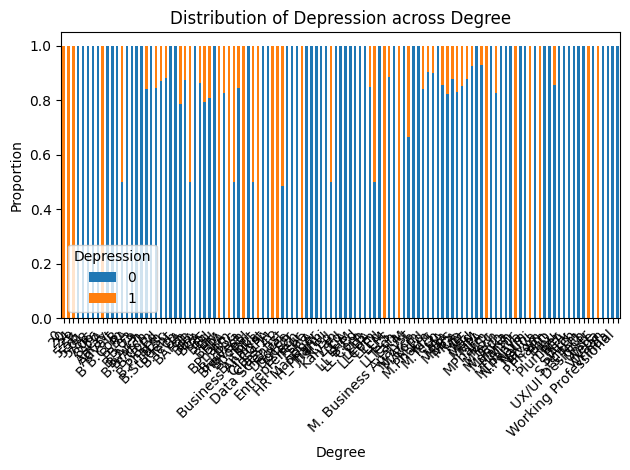


Information Value and Weight of Evidence:
Information Value: inf
Weight of Evidence:
  0: inf
  20: inf
  24: inf
  29: -inf
  5.56: -inf
  5.61: -inf
  5.88: -inf
  7.06: -inf
  8.56: inf
  ACA: -inf
  Aarav: -inf
  Advait: -inf
  B: 1.5048
  B B.Com: -inf
  B BA: -inf
  B.03: -inf
  B.3.79: -inf
  B.Arch: -0.1720
  B.B.Arch: -inf
  B.Com: -0.1859
  B.Ed: -0.4074
  B.Pharm: -0.4953
  B.Sc: -inf
  B.Student: -inf
  B.Tech: 0.2039
  BA: -0.4332
  BArch: 1.5048
  BB: -inf
  BBA: -0.3578
  BCA: 0.1425
  BE: 0.0553
  BEd: -inf
  BH: inf
  BHM: -0.0626
  BPA: inf
  BPharm: 1.5048
  BSc: -0.1868
  Badhya: inf
  Bhavesh: -inf
  Bhopal: 1.5048
  Brit: inf
  Brithika: -inf
  Business Analyst: -inf
  CGPA: inf
  Class 11: inf
  Class 12: 1.5549
  Data Scientist: -inf
  Degree: -inf
  Doctor: -inf
  E.Tech: inf
  Entrepreneur: -inf
  Esha: -inf
  HCA: -inf
  HR Manager: -inf
  H_Pharm: -inf
  Jhanvi: 1.5048
  K.Ed: -inf
  Kalyan: -inf
  L.Ed: -inf
  LCA: -inf
  LHM: -inf
  LL B.Ed: -inf
  LL.Com

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr

def analyze_degree_depression_relationship(df):
    # 1. Chi-Square Test
    contingency_table = pd.crosstab(df['Degree'], df['Depression'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    cramers_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))

    print("Chi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Cramer's V: {cramers_v:.4f}")

    # 2. Point Biserial Correlation
    numeric_degree = pd.factorize(df['Degree'])[0]
    correlation, pb_p_value = pointbiserialr(numeric_degree, df['Depression'])

    print("\nPoint Biserial Correlation:")
    print(f"Correlation: {correlation:.4f}")
    print(f"P-value: {pb_p_value:.4f}")

    # 3. Visualization
    plt.figure(figsize=(12, 6))
    prop_data = df.groupby('Degree')['Depression'].value_counts(normalize=True).unstack()
    prop_data.plot(kind='bar', stacked=True)
    plt.title('Distribution of Depression across Degree')
    plt.xlabel('Degree')
    plt.ylabel('Proportion')
    plt.legend(title='Depression')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 4. Information Value (IV) and Weight of Evidence (WOE)
    cross_tab = pd.crosstab(df['Degree'], df['Depression'], normalize='columns')
    woe = np.log(cross_tab[1] / cross_tab[0])
    iv = np.sum((cross_tab[1] - cross_tab[0]) * woe)

    print("\nInformation Value and Weight of Evidence:")
    print(f"Information Value: {iv:.4f}")
    print("Weight of Evidence:")
    for degree, woe_value in woe.items():
        print(f"  {degree}: {woe_value:.4f}")

    # 5. Summary Statistics
    summary = pd.DataFrame({
        'Chi-Square': chi2,
        'P-Value': p_value,
        'Cramers_V': cramers_v,
        'Point_Biserial_Correlation': correlation,
        'Information_Value': iv
    }, index=['Degree'])

    print("\nSummary of Relationship:")
    print(summary)

# Assuming df is your DataFrame
# Make sure 'Degree' is categorical and 'Depression' is binary (0/1)
analyze_degree_depression_relationship(df)

In [11]:
print(df["Dietary Habits"].unique())

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']


In [12]:
# count = 1000
# n=0
# while count>0:
#     count-=1
#     for i in df["Dietary Habits"]:
#         if i == 'Bsc':
#             n+=1
# print(n)


# Equivalent code 
# n = df['Dietary Habits'].value_counts()['Bsc']
# n = df['Dietary Habits'].value_counts()['Bsc']
# n = (df['Dietary Habits'] == 'Unhealthy').sum()
# print(n)
# df['Depression'].value_counts()
# print((25567/(115133+25567))*100)  #18.17128642501777% to make 30% we need 16643 more rows
# print((0.3*(115133+25567)))   #42210.0
# print(42210-25567) #reuired 16643 rows of class 1 to reduce the imbalance between the classes

In [13]:
df_Depressed = pd.read_csv('/kaggle/input/df-depressed/depressed_dataset/depressed_dataset.csv')

In [14]:
# df_final = pd.read_csv('/kaggle/input/depression-surveydataset-for-analysis/final_depression_dataset_1.csv')
print(df_final.columns )
print()  
print()

print(df_Depressed.columns)

Index(['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


Index(['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [15]:

# Assuming df1 and df2 are your two datasets
df_balanced= pd.concat([df, df_Depressed], ignore_index=True)
df_balanced['Depression'].value_counts()

Depression
0    115133
1     51134
Name: count, dtype: int64

In [16]:
# Display the first few rows of the new dataframe
def count_unique_values(dataframe):
    unique_counts = {}
    
    for column in dataframe.columns:
        unique_values = dataframe[column].nunique()
        unique_counts[column] = unique_values
    
    return unique_counts

# Call the function with your DataFrame
result = count_unique_values(df_balanced)

# Print the results
for column, count in result.items():
    print(f"'{column}':has {count} unique values")

'Gender':has 2 unique values
'Age':has 43 unique values
'Working Professional or Student':has 2 unique values
'Profession':has 65 unique values
'Academic Pressure':has 5 unique values
'Work Pressure':has 5 unique values
'CGPA':has 12976 unique values
'Study Satisfaction':has 5 unique values
'Job Satisfaction':has 5 unique values
'Sleep Duration':has 37 unique values
'Dietary Habits':has 24 unique values
'Degree':has 116 unique values
'Have you ever had suicidal thoughts ?':has 2 unique values
'Work/Study Hours':has 13 unique values
'Financial Stress':has 5 unique values
'Family History of Mental Illness':has 2 unique values
'Depression':has 2 unique values


In [17]:
df_org = pd.concat([df_balanced, df_final],ignore_index= True)

In [18]:
df_org['Depression'] = df_org['Depression'].map({'No': 0, 'Yes': 1, 0: 0, 1: 1})
df_org['Depression'].value_counts()

Depression
0    117234
1     51589
Name: count, dtype: int64

In [19]:
# Export DataFrame to CSV
df_org.to_csv('df_balnced_combined.csv', index=False)

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Load your data
df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')

# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column types
numeric_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
categorical_features = ['Gender', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9248630238412557

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     23406
           1       0.88      0.87      0.88     10359

    accuracy                           0.92     33765
   macro avg       0.91      0.91      0.91     33765
weighted avg       0.92      0.92      0.92     33765



In [21]:
# df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')
# df['Combined_Pressure'] = df['Academic Pressure'].fillna(df['Work Pressure'])
# df_test['Combined_Pressure'] = df_test['Academic Pressure'].fillna(df['Work Pressure'])

In [22]:
# df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')




# columns_to_drop = ['Academic Pressure','Work Pressure']


# # Drop the columns from df
# df = df.drop(columns=columns_to_drop, axis=1)

# # Drop the columns from df_test
# df_test = df_test.drop(columns=columns_to_drop, axis=1)
# Drop Gender because it has no importance or very little importance
# Lets drop degree and profession to check the accuracy
# Converting sleep duration to continous value somehow



In [23]:
for column in df.columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts(dropna=False))
    print("-" * 50)


Value counts for Gender:
Gender
Male      92979
Female    75844
Name: count, dtype: int64
--------------------------------------------------

Value counts for Age:
Age
18.0    6846
20.0    5921
56.0    5332
28.0    5254
49.0    5210
24.0    5187
38.0    4750
25.0    4662
53.0    4608
21.0    4536
19.0    4503
29.0    4499
57.0    4471
23.0    4466
47.0    4367
46.0    4193
33.0    4100
51.0    4027
43.0    4013
54.0    3999
27.0    3997
59.0    3854
48.0    3808
45.0    3665
31.0    3626
42.0    3545
50.0    3530
39.0    3416
41.0    3330
40.0    3306
44.0    3290
22.0    3226
34.0    3206
26.0    3022
35.0    2995
58.0    2981
55.0    2907
37.0    2897
36.0    2839
30.0    2640
52.0    2635
32.0    2602
60.0    2562
Name: count, dtype: int64
--------------------------------------------------

Value counts for Working Professional or Student:
Working Professional or Student
Working Professional    124312
Student                  44511
Name: count, dtype: int64
------------------------

In [24]:
for column in df_test.columns:
    print(f"\nValue counts for {column}:")
    print(df_test[column].value_counts(dropna=False))
    print("-" * 50)


Value counts for Gender:
Gender
Male      51262
Female    42538
Name: count, dtype: int64
--------------------------------------------------

Value counts for Age:
Age
56.00    3432
49.00    3425
38.00    3008
53.00    2958
57.00    2875
47.00    2740
46.00    2728
18.00    2614
59.00    2551
54.00    2549
51.00    2544
43.00    2506
48.00    2459
20.00    2335
45.00    2329
50.00    2311
24.00    2296
42.00    2295
28.00    2292
39.00    2279
44.00    2242
29.00    2152
41.00    2093
33.00    2057
58.00    1982
25.00    1953
40.00    1950
35.00    1940
21.00    1930
55.00    1923
23.00    1870
37.00    1789
34.00    1785
36.00    1742
19.00    1731
27.00    1719
60.00    1701
52.00    1687
31.00    1660
22.00    1417
26.00    1362
30.00    1361
32.00    1227
32.08       1
Name: count, dtype: int64
--------------------------------------------------

Value counts for Working Professional or Student:
Working Professional or Student
Working Professional    75028
Student                 1

VALUE COUNTS HERE


In [25]:
# df
# df
Value counts for Sleep Duration:
Sleep Duration
Less than 5 hours    48493
7-8 hours            44452
More than 8 hours    37913
5-6 hours            37872
_RARE_                  14
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
45                       2
10-11 hours              2
8-9 hours                2
9-11 hours               2
Unhealthy                2
Sleep_Duration           2
Work_Study_Hours         1
9-5                      1
3-6 hours                1
45-48 hours              1
than 5 hours             1
Pune                     1
9-5 hours                1
49 hours                 1
1-2 hours                1
10-6 hours               1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
9-6 hours                1
Name: count, dtype: int64
--------------------------------------------------

Value counts for Dietary Habits:
Dietary Habits
Unhealthy            59351
Moderate             58705
Healthy              50730
_RARE_                  10
NaN                      4
More Healthy             2
No                       2
Yes                      2
Less Healthy             1
2                        1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Pratham                  1
No Healthy               1
BSc                      1
Electrician              1
1.0                      1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
Hormonal                 1
Name: count, dtype: int64
        
# df_test
Value counts for Sleep Duration:
Sleep Duration
Less than 5 hours                      25661
7-8 hours                              24491
More than 8 hours                      22190
5-6 hours                              21404
6-7 hours                                  7
8-9 hours                                  6
4-5 hours                                  6
2-3 hours                                  4
3-4 hours                                  3
9-5 hours                                  2
1-6 hours                                  2
9-5                                        2
Meerut                                     2
4-6 hours                                  2
1-2 hours                                  2
10-6 hours                                 1
9-10 hours                                 1
9-11 hours                                 1
50-75 hours                                1
6 hours                                    1
1-3 hours                                  1
8-89 hours                                 1
20-21 hours                                1
Have_you_ever_had_suicidal_thoughts        1
60-65 hours                                1
9-6 hours                                  1
than 5 hours                               1
0                                          1
Unhealthy                                  1
Vivan                                      1
3-6 hours                                  1
Name: count, dtype: int64
--------------------------------------------------

Value counts for Dietary Habits:
Dietary Habits
Moderate        33018
Unhealthy       30786
Healthy         29966
No                  6
NaN                 5
More Healthy        2
Academic            1
Naina               1
1.0                 1
Raghav              1
Vivaan              1
5 Unhealthy         1
Soham               1
Educational         1
Resistant           1
5 Healthy           1
MCA                 1
Mealy               1
Less Healthy        1
Male                1
Prachi              1
Indoor              1
Kolkata             1

SyntaxError: invalid syntax (3153517592.py, line 3)

In [ ]:
def clean_sleep_duration(value):
    if pd.isna(value):
        return value
    
    value = str(value).lower().strip()
    
    # Main categories mapping
    if 'less than 5' in value or '< 5' in value:
        return 'Less than 5 hours'
    elif '5-6' in value or '4-6' in value:
        return '5-6 hours'
    elif '7-8' in value:
        return '7-8 hours'
    elif 'more than 8' in value or '> 8' in value:
        return 'More than 8 hours'
    elif any(x in value for x in ['1-', '2-', '3-', '4-']):
        return 'Less than 5 hours'
    else:
        return 'Other'

def clean_dietary_habits(value):
    if pd.isna(value):
        return value
    
    value = str(value).lower().strip()
    
    # Main categories mapping
    if 'unhealthy' in value:
        return 'Unhealthy'
    elif 'moderate' in value:
        return 'Moderate'
    elif 'healthy' in value:
        return 'Healthy'
    else:
        return 'Other'

# Apply the cleaning functions to both DataFrames
df['Sleep Duration'] = df['Sleep Duration'].apply(clean_sleep_duration)
df['Dietary Habits'] = df['Dietary Habits'].apply(clean_dietary_habits)

df_test['Sleep Duration'] = df_test['Sleep Duration'].apply(clean_sleep_duration)
df_test['Dietary Habits'] = df_test['Dietary Habits'].apply(clean_dietary_habits)

# Remove rows with 'Other' category if needed
df = df[~(df['Sleep Duration'].isin(['Other'])) & ~(df['Dietary Habits'].isin(['Other']))]
df_test = df_test[~(df_test['Sleep Duration'].isin(['Other'])) & ~(df_test['Dietary Habits'].isin(['Other']))]

# Verify the cleaned categories
print("Training Data:")
print("\nSleep Duration value counts:")
print(df['Sleep Duration'].value_counts())
print("\nDietary Habits value counts:")
print(df['Dietary Habits'].value_counts())

print("\nTest Data:")
print("\nSleep Duration value counts:")
print(df_test['Sleep Duration'].value_counts())
print("\nDietary Habits value counts:")
print(df_test['Dietary Habits'].value_counts())

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
df_test.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

# Load your data
df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')

# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column types
numeric_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
categorical_features = ['Gender', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Prepare the data
X_transformed = preprocessor.fit_transform(X)

# Convert to dense array if sparse
if isinstance(X_transformed, np.matrix):
    X_transformed = X_transformed.A
elif hasattr(X_transformed, 'toarray'):
    X_transformed = X_transformed.toarray()

# LightGBM Classifier with Extensive Hyperparameter Tuning
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 70,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

# 'bagging_fraction': 0.7, 'feature_fraction': 0.7, 'learning_rate': 0.1, 'num_leaves': 70
# Cross-validation to get a robust estimate of model performance
cv_scores = cross_val_score(
    lgb.LGBMClassifier(**lgbm_params), 
    X_transformed, 
    y, 
    cv=5, 
    scoring='accuracy'
)



# Train the final model
lgbm_clf = lgb.LGBMClassifier(**lgbm_params)
lgbm_clf.fit(X_transformed, y)

# Predict on test set
X_test_transformed = preprocessor.transform(X_test)
if isinstance(X_test_transformed, np.matrix):
    X_test_transformed = X_test_transformed.A
elif hasattr(X_test_transformed, 'toarray'):
    X_test_transformed = X_test_transformed.toarray()

y_pred = lgbm_clf.predict(X_test_transformed)

# Evaluation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Feature Importance
feature_importance = lgbm_clf.feature_importances_
feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features).tolist() + 
    preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
)

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\nFeature Importance Ranking:")
for f in range(min(10, len(feature_importance))):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))


    
    
datasets = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

# Prepare the test dataset using the same preprocessing steps
# X_test_final = datasets.drop('id', axis=1)  # Assuming 'id' is the identifier and not a feature
X_test_final_transformed = preprocessor.transform(df_test)

# Make predictions on the test dataset
predictions = lgbm_clf.predict(X_test_final_transformed)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': datasets['id'],
    'Depression': predictions
})

# Save the submission file
submission.to_csv('Sub7_lgbm.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.05, 0.1, 0.2],
    'feature_fraction': [0.7, 0.8, 0.9],
    'bagging_fraction': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(
    estimator=lgb.LGBMClassifier(objective='binary', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_transformed, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
# Load your data
# df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')

# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# columns_to_drop = ['Gender','Degree','Profession','Academic Pressure','Work Pressure']
# Define column types
numeric_features = ['Age', 'Combined_Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
categorical_features = ['Working Professional or Student','Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# OPTUNA
import optuna
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import numpy as np
# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column types (keeping your existing definitions)
numeric_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                   'Job Satisfaction', 'Work/Study Hours', 'Financial Stress','Combined_Pressure']
categorical_features = ['Gender', 'Working Professional or Student', 'Profession', 'Sleep Duration', 
                       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
                       'Family History of Mental Illness']

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

def create_model(trial):
    """Create a CatBoost model with adjusted hyperparameters ranges."""
    return CatBoostClassifier(
        iterations=trial.suggest_int('iterations', 100, 1000),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),  # Adjusted range
        depth=trial.suggest_int('depth', 4, 8),  # Reduced maximum depth
        l2_leaf_reg=trial.suggest_float('l2_leaf_reg', 1.0, 10.0),  # Increased minimum value
        border_count=trial.suggest_int('border_count', 32, 255),
        bagging_temperature=trial.suggest_float('bagging_temperature', 0.0, 1.0),  # Reduced range
        random_strength=trial.suggest_int('random_strength', 1, 10),
        min_data_in_leaf=trial.suggest_int('min_data_in_leaf', 5, 50),
        verbose=False,
        random_state=42
    )

def objective(trial):
    """Objective function with error handling."""
    try:
        # Create pipeline with the trial's suggested hyperparameters
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', create_model(trial))
        ])
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate multiple metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Return the mean of multiple metrics
        return (accuracy + f1) / 2
    
    except Exception as e:
        print(f"Trial failed with error: {str(e)}")
        return float('-inf')

def objective_with_cv(trial):
    """Objective function with cross-validation and error handling."""
    try:
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', create_model(trial))
        ])
        
        # Perform cross-validation with multiple metrics
        accuracy_scores = cross_val_score(
            model, 
            X_train, 
            y_train, 
            cv=5, 
            scoring='accuracy',
            n_jobs=-1,
            error_score='raise'
        )
        
        f1_scores = cross_val_score(
            model, 
            X_train, 
            y_train, 
            cv=5, 
            scoring='f1_weighted',
            n_jobs=-1,
            error_score='raise'
        )
        
        # Return mean of both metrics
        return (np.mean(accuracy_scores) + np.mean(f1_scores)) / 2
    
    except Exception as e:
        print(f"CV trial failed with error: {str(e)}")
        return float('-inf')

# Create study object with pruner
study = optuna.create_study(
    direction="maximize",
    study_name="catboost_optimization",
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=5,
        n_warmup_steps=5,
        interval_steps=1
    )
)

# Add custom callback for logging
def callback(study, trial):
    if trial.value is not None:
        print(f"Trial {trial.number} finished with value: {trial.value}")

# Optimize
study.optimize(
    objective,
    n_trials=50,  # Reduced number of trials
    timeout=3600,
    show_progress_bar=True,
    callbacks=[callback]
)

# Print results
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Create and train the model with the best parameters
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        **study.best_params,
        verbose=False,
        random_state=42
    ))
])

best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Visualization of optimization results
import plotly.graph_objects as go

# Plot optimization history
optimization_history = optuna.visualization.plot_optimization_history(study)
optimization_history.show()

# Plot parameter importances
param_importances = optuna.visualization.plot_param_importances(study)
param_importances.show()

# Plot parallel coordinate plot
parallel_coordinate = optuna.visualization.plot_parallel_coordinate(study)
parallel_coordinate.show()

# Add cross-validation
from sklearn.model_selection import cross_val_score

def objective_with_cv(trial):
    """Objective function with cross-validation."""
    
    # Create pipeline with the trial's suggested hyperparameters
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', create_model(trial))
    ])
    
    # Perform cross-validation
    scores = cross_val_score(
        model, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Return mean CV score
    return scores.mean()

# Create new study with cross-validation
study_cv = optuna.create_study(
    direction="maximize",
    study_name="catboost_optimization_cv"
)

# Optimize with cross-validation
study_cv.optimize(
    objective_with_cv,
    n_trials=100,
    timeout= 3600,
    show_progress_bar=True
)

# Print results of CV optimization
print("\nBest trial (with cross-validation):")
trial_cv = study_cv.best_trial

print("  Value: ", trial_cv.value)
print("  Params: ")
for key, value in trial_cv.params.items():
    print(f"    {key}: {value}")

# Additional analysis: Feature importance of the best model
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        **study_cv.best_params,
        verbose=False,
        random_state=42
    ))
])

In [ ]:
# Get feature names after preprocessing
feature_names = (numeric_features + 
                best_model.named_steps['preprocessor']
                .named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(categorical_features).tolist())

# Get feature importances
importances = best_model.named_steps['classifier'].feature_importances_

# Create feature importance plot
import plotly.express as px

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

fig = px.bar(
    feature_importance_df,
    x='Feature',
    y='Importance',
    title='Feature Importances'
)
fig.show()

In [ ]:
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        iterations=626,
        learning_rate=0.06286299452630735,
        depth=6,
        l2_leaf_reg=0.7550695430688047,
        border_count=203,
        bagging_temperature=0.33554861012868803,
        random_strength=14,
        min_data_in_leaf=21,
        verbose=False,
        random_state=42
    ))
])

# Train the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")

In [ ]:
if 'Depression' in df_test.columns:
    df_test = df_test.drop('Depression', axis=1)

# Make predictions
predictions = best_model.predict(df_test)

# Get prediction probabilities
prediction_proba = best_model.predict_proba(df_test)

# Create a new dataframe with the predictions
df_predictions = pd.DataFrame({
    'Predicted_Depression': predictions,
    'Probability_No_Depression': prediction_proba[:, 0],
    'Probability_Depression': prediction_proba[:, 1]
})

# Display the first few rows of the new predictions dataframe
print(df_predictions.head())



In [ ]:
datasets = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

# Create submission dataframe
submission = pd.DataFrame({
    'id': datasets['id'],
    'Depression': df_predictions['Predicted_Depression']
})

# Save to CSV
submission.to_csv('SUB6.csv', index=False)

FILL NOT AVAILABLE

In [ ]:
# # print(submission.isna().sum())
# def fill_random(df):
#     mask = df['Depression'].isnull()
#     random_values = np.random.randint(0, 2, size=mask.sum()).astype(float)  # Convert to float to match format
#     df.loc[mask, 'Depression'] = random_values
#     return df

# # Fill null values in the DataFrame
# submission = fill_random(submission)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    StratifiedKFold, 
    cross_validate
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, 
    precision_recall_curve,
    average_precision_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    f1_score
)
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')

# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Define column types
numeric_features = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 
    'Financial Stress'
]
categorical_features = [
    'Gender', 'Working Professional or Student', 'Profession', 
    'Sleep Duration', 'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Best Model with Tuned Hyperparameters
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        iterations=626,
        learning_rate=0.06286299452630735,
        depth=6,
        l2_leaf_reg=0.7550695430688047,
        border_count=203,
        bagging_temperature=0.33554861012868803,
        random_strength=14,
        min_data_in_leaf=21,
        verbose=False,
        random_state=42
    ))
])

# Comprehensive Model Evaluation
def comprehensive_model_evaluation(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluation Metrics
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Average Precision': average_precision_score(y_test, y_pred_proba),
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    return results

# Perform Cross-Validation
def perform_cross_validation(model, X, y):
    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform cross-validation with multiple scoring metrics
    cv_results = cross_validate(
        model, 
        X, y, 
        cv=cv, 
        scoring=['accuracy', 'f1_weighted', 'roc_auc'],
        return_train_score=True
    )
    
    return cv_results

# Feature Importance Analysis
def get_feature_importance(model):
    # Get feature names
    feature_names = (
        preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features).tolist() + 
        preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
    )
    
    # Get feature importances
    clf = model.named_steps['classifier']
    feature_importance = clf.get_feature_importance()
    
    # Create and sort feature importance DataFrame
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    return feature_imp_df

# Visualization Functions
def plot_feature_importance(feature_imp_df, top_n=10):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='importance', 
        y='feature', 
        data=feature_imp_df.head(top_n)
    )
    plt.title('Top Feature Importances')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues'
    )
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    # Fit the model
    best_model.fit(X_train, y_train)
    
    # Comprehensive Evaluation
    eval_results = comprehensive_model_evaluation(best_model, X_test, y_test)
    
    # Print Evaluation Results
    print("\n--- Model Evaluation Results ---")
    for metric, value in eval_results.items():
        print(f"{metric}:")
        print(value)
        print()
    
    # Cross-Validation
    cv_results = perform_cross_validation(best_model, X, y)
    print("\n--- Cross-Validation Results ---")
    for metric in ['test_accuracy', 'test_f1_weighted', 'test_roc_auc']:
        print(f"{metric}:")
        print(f"Mean: {cv_results[metric].mean()}")
        print(f"Std: {cv_results[metric].std()}")
        print()
    
    # Feature Importance
    feature_imp_df = get_feature_importance(best_model)
    print("\n--- Top 10 Most Important Features ---")
    print(feature_imp_df.head(10))
    
    # Visualizations
    plot_feature_importance(feature_imp_df)
    plot_confusion_matrix(eval_results['Confusion Matrix'])



In [ ]:
# Submission Preparation
dataset = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
def prepare_submission(model, test_dataset):
    # Prepare test data
#     X_test_final = test_dataset.drop('id', axis=1)
    X_test_final= df_test
    # Make predictions
    predictions = model.predict(X_test_final)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'id': dataset['id'],
        'Depression': predictions
    })
    
    return submission

# Load test dataset and prepare submission

test_dataset = df_test
submission = prepare_submission(best_model, test_dataset)
submission.to_csv('submission_catboost.csv', index= False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
import lightgbm as lgb
from catboost import CatBoostClassifier

# Load dataset
df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')

# Convert object columns to categorical
categorical_columns = [
    'Gender', 'Working Professional or Student', 'Profession', 
    'Sleep Duration', 'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Define column types
numeric_features = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 
    'Financial Stress'
]
categorical_features = categorical_columns  # Use the updated list of categorical features

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Best Model with Tuned Hyperparameters (CatBoost)
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(
        iterations=626,
        learning_rate=0.06286299452630735,
        depth=6,
        l2_leaf_reg=0.7550695430688047,
        border_count=203,
        bagging_temperature=0.33554861012868803,
        random_strength=14,
        min_data_in_leaf=21,
        verbose=False,
        random_state=42
    ))
])

best_model.fit(X_train, y_train)

# Prepare the data for LightGBM
X_transformed = preprocessor.fit_transform(X)

# LightGBM Classifier with Extensive Hyperparameter Tuning
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 70,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

# Train the final LightGBM model
lgbm_clf = lgb.LGBMClassifier(**lgbm_params)
lgbm_clf.fit(X_transformed, y)

# Ensemble Methods as Predictive Models
# 1. Voting Ensemble (Hard Voting)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_clf),
        ('catboost', best_model)
    ],
    voting='hard'
)
hard_voting_clf.fit(X_train, y_train)

# 2. Voting Ensemble (Soft Voting)
soft_voting_clf = VotingClassifier(
    estimators=[
        ('lgb m', lgbm_clf),
        ('catboost', best_model)
    ],
    voting='soft'
)
soft_voting_clf.fit(X_train, y_train)

# 3. Stacking Ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('lgbm', lgbm_clf),
        ('catboost', best_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)
stacking_clf.fit(X_train, y_train)

# 4. Custom Weighted Ensemble Class
class WeightedEnsemble:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights or [1/len(models)] * len(models)
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict_proba(self, X):
        # Get probabilities from each model
        model_probs = [model.predict_proba(X) for model in self.models]
        
        # Weighted average of probabilities
        weighted_probs = np.zeros_like(model_probs[0])
        for prob, weight in zip(model_probs, self.weights):
            weighted_probs += prob * weight
        
        return weighted_probs
    
    def predict(self, X):
        # Convert weighted probabilities to class predictions
        return np.argmax(self.predict_proba(X), axis=1)

# Create Weighted Ensemble
weighted_ensemble = WeightedEnsemble(
    models=[lgbm_clf, best_model],
    weights=[0.6, 0.4]  # Adjust based on individual model performance
)
weighted_ensemble.fit(X_train, y_train)

# Prepare Submission Function
def prepare_submission(ensemble_model, test_dataset):
    # Prepare test data
    X_test_final = df_test
    
    # Make predictions
    predictions = ensemble_model.predict(X_test_final)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'id': dataset['id'],
        'Depression': predictions
    })
    
    return submission

# Load test dataset
test_dataset = df_test# Adjust path as necessary

# Create Submissions using Different Ensemble Methods
hard_voting_submission = prepare_submission(hard_voting_clf, test_dataset)
soft_voting_submission = prepare_submission(soft_voting_clf, test_dataset)
stacking_submission = prepare_submission(stacking_clf, test_dataset)
weighted_submission = prepare_submission(weighted_ensemble, test_dataset)

# Save Submissions
hard_voting_submission.to_csv('hard_voting_submission.csv', index=False)
soft_voting_submission.to_csv('soft_voting_submission.csv', index=False)
stacking_submission.to_csv('stacking_submission.csv', index=False)
weighted_submission.to_csv('weighted_submission.csv', index=False)

# Comprehensive Evaluation Function
def evaluate_ensemble(ensemble_model, X_test, y_test):
    # Predictions
    y_pred = ensemble_model.predict(X_test)
    
    # Probability predictions (if available)
    try:
        y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]
    except:
        y_pred_proba = None
    
    # Evaluation Metrics
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred)
    }
    
    # Add ROC AUC if probabilities are available
    if y_pred_proba is not None:
        results['ROC AUC'] = roc_auc_score(y_test, y_pred_proba)
    
    return results

# Evaluate Each Ensemble Method
print("Hard Voting Ensemble Evaluation:")
print(evaluate_ensemble(hard_voting_clf, X_test, y_test))

print("\nSoft Voting Ensemble Evaluation:")
print(evaluate_ensemble(soft_voting_clf, X_test, y_test))

print("\nStacking Ensemble Evaluation:")
print(evaluate_ensemble(stacking_clf, X_test, y_test))

print("\nWeighted Ensemble Evaluation:")
print(evaluate_ensemble(weighted_ensemble, X_test, y_test))

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
import lightgbm as lgb
from catboost import CatBoostClassifier

# Load dataset
df = pd.read_csv('/kaggle/working/df_balnced_combined.csv')

# Convert object columns to categorical
categorical_columns = [
    'Gender', 'Working Professional or Student', 'Profession', 
    'Sleep Duration', 'Dietary Habits', 'Degree', 
    'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Separate features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Define column types
numeric_features = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 
    'Financial Stress'
]
categorical_features = categorical_columns

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the models with best hyperparameters
catboost_params = {
    'iterations': 626,
    'learning_rate': 0.06286,
    'depth': 6,
    'l2_leaf_reg': 0.755,
    'border_count': 203,
    'bagging_temperature': 0.3355,
    'random_strength': 14,
    'min_data_in_leaf': 21,
    'verbose': False,
    'random_state': 42
}
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(**catboost_params))
])

lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 70,
    'learning_rate': 0.1,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}
lgbm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(**lgbm_params))
])

# Train individual models
lgbm_model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

# Ensemble methods
# 1. Hard Voting Ensemble
hard_voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('catboost', best_model)
    ],
    voting='hard'
)
hard_voting_clf.fit(X_train, y_train)

# 2. Soft Voting Ensemble
soft_voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('catboost', best_model)
    ],
    voting='soft'
)
soft_voting_clf.fit(X_train, y_train)

# 3. Stacking Ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('catboost', best_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)
stacking_clf.fit(X_train, y_train)

# 4. Weighted Ensemble
class WeightedEnsemble:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights or [1 / len(models)] * len(models)
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict_proba(self, X):
        model_probs = [model.predict_proba(X) for model in self.models]
        weighted_probs = np.zeros_like(model_probs[0])
        for prob, weight in zip(model_probs, self.weights):
            weighted_probs += prob * weight
        return weighted_probs
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

weighted_ensemble = WeightedEnsemble(
    models=[lgbm_model, best_model],
    weights=[0.6, 0.4]
)
weighted_ensemble.fit(X_train, y_train)

# Evaluation function
def evaluate_ensemble(ensemble_model, X_test, y_test):
    y_pred = ensemble_model.predict(X_test)
    try:
        y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]
    except:
        y_pred_proba = None
    
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred)
    }
    if y_pred_proba is not None:
        results['ROC AUC'] = roc_auc_score(y_test, y_pred_proba)
    
    return results

# Evaluate each ensemble model
print("Hard Voting Ensemble Evaluation:")
print(evaluate_ensemble(hard_voting_clf, X_test, y_test))

print("\nSoft Voting Ensemble Evaluation:")
print(evaluate_ensemble(soft_voting_clf, X_test, y_test))

print("\nStacking Ensemble Evaluation:")
print(evaluate_ensemble(stacking_clf, X_test, y_test))

print("\nWeighted Ensemble Evaluation:")
print(evaluate_ensemble(weighted_ensemble, X_test, y_test))

# Prepare Submission Function
def prepare_submission(ensemble_model, test_dataset):
    # Prepare test data
    X_test_final = df_test
    
    # Make predictions
    predictions = ensemble_model.predict(X_test_final)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'id': dataset['id'],
        'Depression': predictions
    })
    
    return submission

# Load test dataset
test_dataset = df_test# Adjust path as necessary

# Create Submissions
hard_voting_submission = prepare_submission(hard_voting_clf, df_test)
soft_voting_submission = prepare_submission(soft_voting_clf, df_test)
stacking_submission = prepare_submission(stacking_clf, df_test)
weighted_submission = prepare_submission(weighted_ensemble, df_test)

# Save Submissions
hard_voting_submission.to_csv('hard_voting_submission.csv', index=False)
soft_voting_submission.to_csv('soft_voting_submission.csv', index=False)
stacking_submission.to_csv('stacking_submission.csv', index=False)
weighted_submission.to_csv('weighted_submission.csv', index=False)


In [ ]:
def prepare_submission(ensemble_model, test_dataset):
    # Prepare test data
    X_test_final = df_test
    
    # Make predictions
    predictions = ensemble_model.predict(X_test_final)
    
    # Create submission DataFrame
    dataset = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
    submission = pd.DataFrame({
        'id': dataset['id'],
        'Depression': predictions
    })
    
    return submission

# Load test dataset
test_dataset = df_test# Adjust path as necessary

# Create Submissions
hard_voting_submission = prepare_submission(hard_voting_clf, df_test)
soft_voting_submission = prepare_submission(soft_voting_clf, df_test)
stacking_submission = prepare_submission(stacking_clf, df_test)
weighted_submission = prepare_submission(weighted_ensemble, df_test)

# Save Submissions
hard_voting_submission.to_csv('hard_voting_submission.csv', index=False)
soft_voting_submission.to_csv('soft_voting_submission.csv', index=False)
stacking_submission.to_csv('stacking_submission.csv', index=False)
weighted_submission.to_csv('weighted_submission.csv', index=False)

In [ ]:
def prepare_submission(ensemble_model, test_dataset):
    # Prepare test data
    X_test_final = df_test
    
    # Make predictions
    predictions = ensemble_model.predict(X_test_final)
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'id': dataset['id'],
        'Depression': predictions
    })
    
    return submission

# Load test dataset
test_dataset = df_test# Adjust path as necessary

# Create Submissions using Different Ensemble Methods
hard_voting_submission = prepare_submission(hard_voting_clf, test_dataset)
soft_voting_submission = prepare_submission(soft_voting_clf, test_dataset)
stacking_submission = prepare_submission(stacking_clf, test_dataset)
weighted_submission = prepare_submission(weighted_ensemble, test_dataset)

# Save Submissions
hard_voting_submission.to_csv('hard_voting_submission.csv', index=False)
soft_voting_submission.to_csv('soft_voting_submission.csv', index=False)
stacking_submission.to_csv('stacking_submission.csv', index=False)
weighted_submission.to_csv('weighted_submission.csv', index=False)

# Comprehensive Evaluation Function
def evaluate_ensemble(ensemble_model, X_test, y_test):
    # Predictions
    y_pred = ensemble_model.predict(X_test)
    
    # Probability predictions (if available)
    try:
        y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]
    except:
        y_pred_proba = None
    
    # Evaluation Metrics
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred)
    }
    
    # Add ROC AUC if probabilities are available
    if y_pred_proba is not None:
        results['ROC AUC'] = roc_auc_score(y_test, y_pred_proba)
    
    return results

# Evaluate Each Ensemble Method
print("Hard Voting Ensemble Evaluation:")
print(evaluate_ensemble(hard_voting_clf, X_test, y_test))

print("\nSoft Voting Ensemble Evaluation:")
print(evaluate_ensemble(soft_voting_clf, X_test, y_test))

print("\nStacking Ensemble Evaluation:")
print(evaluate_ensemble(stacking_clf, X_test, y_test))

print("\nWeighted Ensemble Evaluation:")
print(evaluate_ensemble(weighted_ensemble, X_test, y_test))